# Estrategia Bull Market - Optimización Adaptada

## Gestor Cuantitativo Profesional

Optimización de cartera en régimen alcista con filtros de momentum y media móvil.

In [10]:
import sys
sys.path.insert(0, '../codigo')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from estrategia_bull_market import EstrategiaBullMarket
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('[OK] Librerias importadas')

[OK] Librerias importadas


In [11]:
datos_retornos = pd.read_excel('../../data/prod_long_sharpe_u60_20260125_v1_train_dataset.csv', sheet_name='Sheet1')
datos_retornos.columns = [f'Activo_{i}' for i in range(1, 61)]

betas_df = pd.read_csv('../betas_resultados.csv')

print(f'[OK] Datos cargados: {datos_retornos.shape}')
print(f'[OK] Período: {datos_retornos.index[0]} a {datos_retornos.index[-1]}')

[OK] Datos cargados: (1758, 60)
[OK] Período: 0 a 1757


## 1. Análisis de Filtros

In [12]:
estrategia = EstrategiaBullMarket(datos_retornos, betas_df)

momentum_6m, momentum_12m = estrategia.calcular_momentum()
encima_sma200 = estrategia.calcular_media_movil_200()
retorno_relativo = estrategia.calcular_retorno_relativo_benchmark()

print('[ANALISIS DE FILTROS]')
print(f'Activos con momentum 6m positivo: {(momentum_6m > 0).sum()}')
print(f'Activos con momentum 12m positivo: {(momentum_12m > 0).sum()}')
print(f'Activos por encima de SMA 200: {encima_sma200.sum()}')
print(f'Activos con retorno relativo positivo: {retorno_relativo.sum()}')

[ANALISIS DE FILTROS]
Activos con momentum 6m positivo: 7
Activos con momentum 12m positivo: 14
Activos por encima de SMA 200: 15
Activos con retorno relativo positivo: 0


In [13]:
activos_filtrados = estrategia.filtrar_activos()

print(f'[RESULTADO FILTRADO]')
print(f'Activos que cumplen criterios: {len(activos_filtrados)}')
print(f'Activos seleccionados: {sorted([a+1 for a in activos_filtrados])}')

df_filtrados = betas_df.iloc[activos_filtrados].copy()
df_filtrados['Momentum_12m'] = momentum_12m.iloc[activos_filtrados].values
df_filtrados['Momentum_6m'] = momentum_6m.iloc[activos_filtrados].values

print('\nTop 10 activos por momentum 12m:')
print(df_filtrados.nlargest(10, 'Momentum_12m')[['Activo', 'Beta', 'Sector', 'Momentum_12m']].to_string(index=False))

[RESULTADO FILTRADO]
Activos que cumplen criterios: 10
Activos seleccionados: [7, 8, 11, 25, 28, 29, 30, 44, 58, 60]

Top 10 activos por momentum 12m:
 Activo     Beta                                   Sector  Momentum_12m
     60 0.586948                                Oil & Gas      6.305216
      7 0.910505                         Banking Services      4.611002
     11 1.255687 Investment Banking & Investment Services      2.133339
     30 1.413836                         Banking Services      1.984250
     58 0.694970                         Banking Services      1.756752
      8 0.474176          Healthcare Equipment & Supplies      1.431204
     29 0.419865                          Pharmaceuticals      1.422947
     28 1.752763 Semiconductors & Semiconductor Equipment      0.901072
     25 1.177212                      Aerospace & Defense      0.813648
     44 0.355157                                Beverages      0.434936


## 2. Optimización Bull Market

In [14]:
pesos = estrategia.optimizar_cartera_bull()
resumen = estrategia.obtener_resumen()

print('[CARTERA OPTIMIZADA - BULL MARKET]')
print(f'Retorno anualizado: {resumen["retorno_anualizado"]:.4f} ({resumen["retorno_anualizado"]*100:.2f}%)')
print(f'Volatilidad: {resumen["volatilidad"]:.4f} ({resumen["volatilidad"]*100:.2f}%)')
print(f'Sharpe Ratio: {resumen["sharpe"]:.4f}')
print(f'Numero de activos: {resumen["n_activos"]}')

print('\n[VECTOR DE PESOS]')
for activo, peso in resumen['activos']:
    print(f'Activo {activo:2d}: {peso:.3f}')

[CARTERA OPTIMIZADA - BULL MARKET]
Retorno anualizado: 0.1140 (11.40%)
Volatilidad: 0.1787 (17.87%)
Sharpe Ratio: 0.6380
Numero de activos: 10

[VECTOR DE PESOS]
Activo  7: 0.338
Activo 60: 0.310
Activo 44: 0.180
Activo 58: 0.052
Activo  8: 0.020
Activo 29: 0.020
Activo 11: 0.020
Activo 25: 0.020
Activo 28: 0.020
Activo 30: 0.020


In [15]:
pesos_redondeados = [round(p, 3) for p in pesos]

print('[VECTOR COMPLETO - 60 ACTIVOS]')
print(pesos_redondeados)

print(f'\nSuma de pesos: {sum(pesos_redondeados):.3f}')

[VECTOR COMPLETO - 60 ACTIVOS]
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.338), np.float64(0.02), np.float64(0.0), np.float64(0.0), np.float64(0.02), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.02), np.float64(0.0), np.float64(0.0), np.float64(0.02), np.float64(0.02), np.float64(0.02), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.18), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.floa

## 3. Visualización

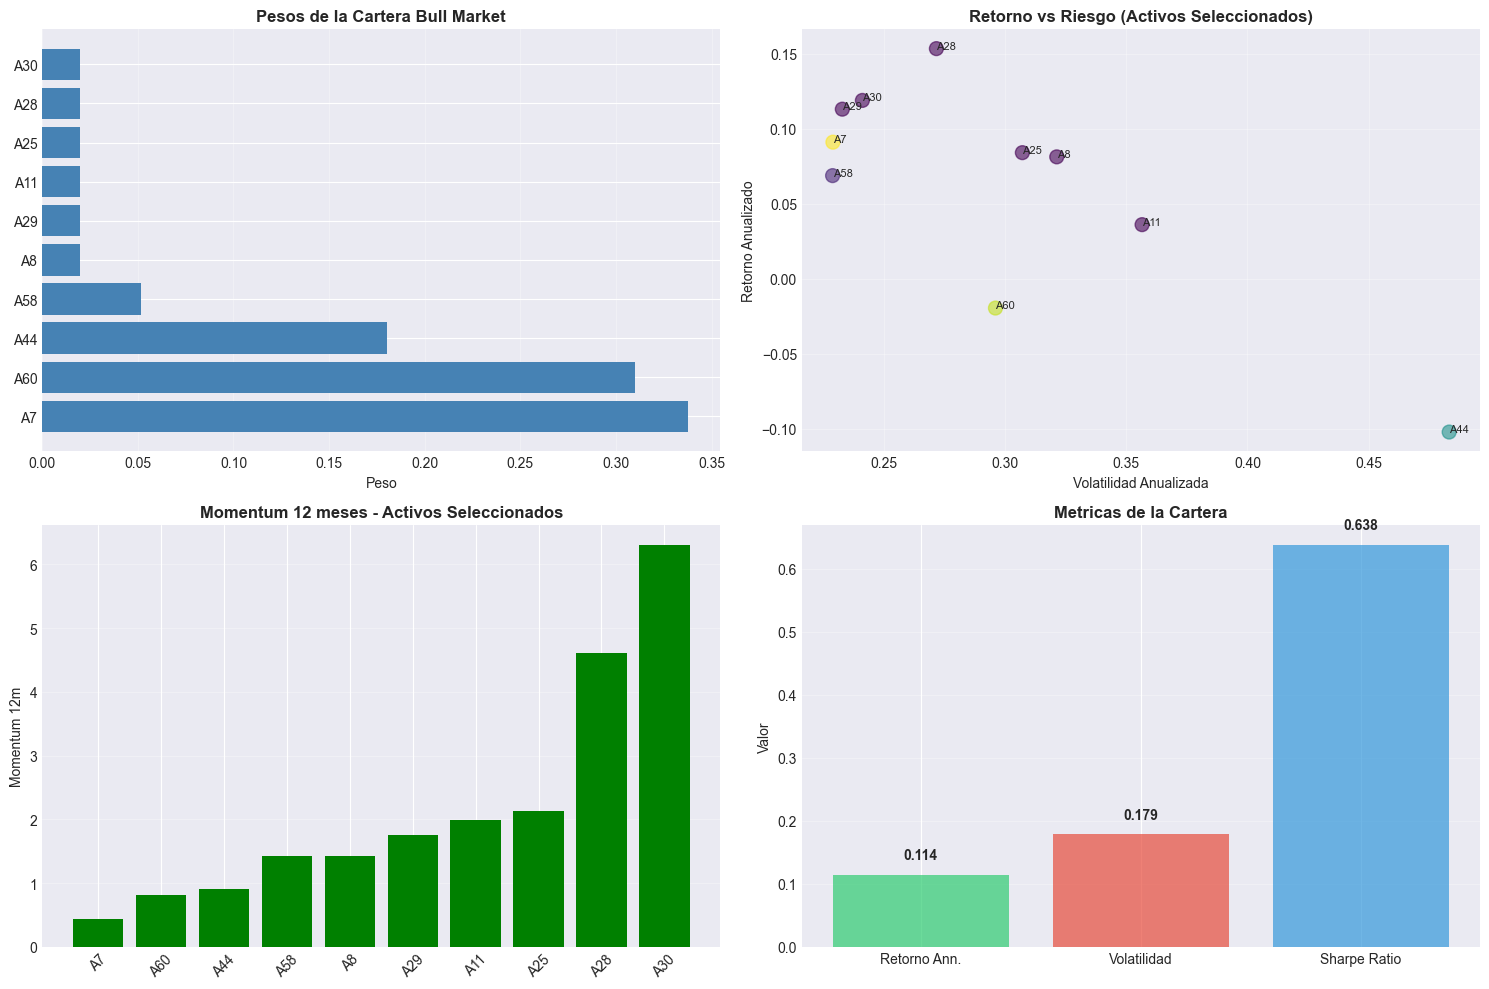

[OK] Grafico guardado: estrategia_bull_market.png


In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

activos_plot = [a for a, _ in resumen['activos']]
pesos_plot = [p for _, p in resumen['activos']]

axes[0, 0].barh(range(len(activos_plot)), pesos_plot, color='steelblue')
axes[0, 0].set_yticks(range(len(activos_plot)))
axes[0, 0].set_yticklabels([f'A{a}' for a in activos_plot])
axes[0, 0].set_xlabel('Peso')
axes[0, 0].set_title('Pesos de la Cartera Bull Market', fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

datos_filtrados = datos_retornos.iloc[:, estrategia.activos_filtrados]
returns_by_asset = datos_filtrados.mean() * 252
vol_by_asset = datos_filtrados.std() * np.sqrt(252)

axes[0, 1].scatter(vol_by_asset, returns_by_asset, s=100, alpha=0.6, c=pesos_plot, cmap='viridis')
axes[0, 1].set_xlabel('Volatilidad Anualizada')
axes[0, 1].set_ylabel('Retorno Anualizado')
axes[0, 1].set_title('Retorno vs Riesgo (Activos Seleccionados)', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

for i, act in enumerate(activos_plot):
    idx = list(estrategia.activos_filtrados).index(act - 1)
    axes[0, 1].annotate(f'A{act}', (vol_by_asset.iloc[i], returns_by_asset.iloc[i]), fontsize=8)

momentum_plot = momentum_12m.iloc[estrategia.activos_filtrados].values
axes[1, 0].bar(range(len(momentum_plot)), momentum_plot, color=['green' if m > 0 else 'red' for m in momentum_plot])
axes[1, 0].set_xticks(range(len(activos_plot)))
axes[1, 0].set_xticklabels([f'A{a}' for a in activos_plot], rotation=45)
axes[1, 0].set_ylabel('Momentum 12m')
axes[1, 0].set_title('Momentum 12 meses - Activos Seleccionados', fontweight='bold')
axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1, 0].grid(axis='y', alpha=0.3)

metrics = {
    'Retorno Ann.': resumen['retorno_anualizado'],
    'Volatilidad': resumen['volatilidad'],
    'Sharpe Ratio': resumen['sharpe']
}

colors_metrics = ['#2ecc71', '#e74c3c', '#3498db']
axes[1, 1].bar(metrics.keys(), metrics.values(), color=colors_metrics, alpha=0.7)
axes[1, 1].set_ylabel('Valor')
axes[1, 1].set_title('Metricas de la Cartera', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

for i, (label, value) in enumerate(metrics.items()):
    axes[1, 1].text(i, value + 0.02, f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('estrategia_bull_market.png', dpi=300, bbox_inches='tight')
plt.show()

print('[OK] Grafico guardado: estrategia_bull_market.png')

In [17]:
df_export = pd.DataFrame({
    'Activo': range(1, 61),
    'Cartera_Bull_Market': pesos_redondeados
})

df_export.to_csv('../vector_pesos_bull_market.csv', index=False)

print('[OK] Vector de pesos exportado: vector_pesos_bull_market.csv')
print('\nVector completo (60 activos):')
print(df_export.to_string(index=False))

[OK] Vector de pesos exportado: vector_pesos_bull_market.csv

Vector completo (60 activos):
 Activo  Cartera_Bull_Market
      1                0.000
      2                0.000
      3                0.000
      4                0.000
      5                0.000
      6                0.000
      7                0.338
      8                0.020
      9                0.000
     10                0.000
     11                0.020
     12                0.000
     13                0.000
     14                0.000
     15                0.000
     16                0.000
     17                0.000
     18                0.000
     19                0.000
     20                0.000
     21                0.000
     22                0.000
     23                0.000
     24                0.000
     25                0.020
     26                0.000
     27                0.000
     28                0.020
     29                0.020
     30                0.020
     31  